In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels as sm

In [47]:
import os
print(os.getcwd())
os.chdir("/Users/IshaanShah/Desktop/weather_data")
print(os.getcwd())

/Users/IshaanShah/Desktop/weather_data
/Users/IshaanShah/Desktop/weather_data


In [437]:
df = pd.read_csv("CO_Pollution_Final.csv")
print(df.shape)
print(df.columns)

(2192, 9)
Index(['date_time', 'humidity', 'precipMM', 'pressure', 'tempC',
       'windspeedKmph', 'location', 'CO_Conc', 'weekday'],
      dtype='object')


In [438]:
df['date_time'] = pd.to_datetime(df['date_time'])

In [439]:
df.set_index('date_time', inplace = True)

## Building an ARIMA model

### Train Test Split

In [467]:
from pmdarima.arima import auto_arima
arima_df = df[["CO_Conc"]]
train_df = arima_df[:1754] #80-20 split
test_df = arima_df [-438:]

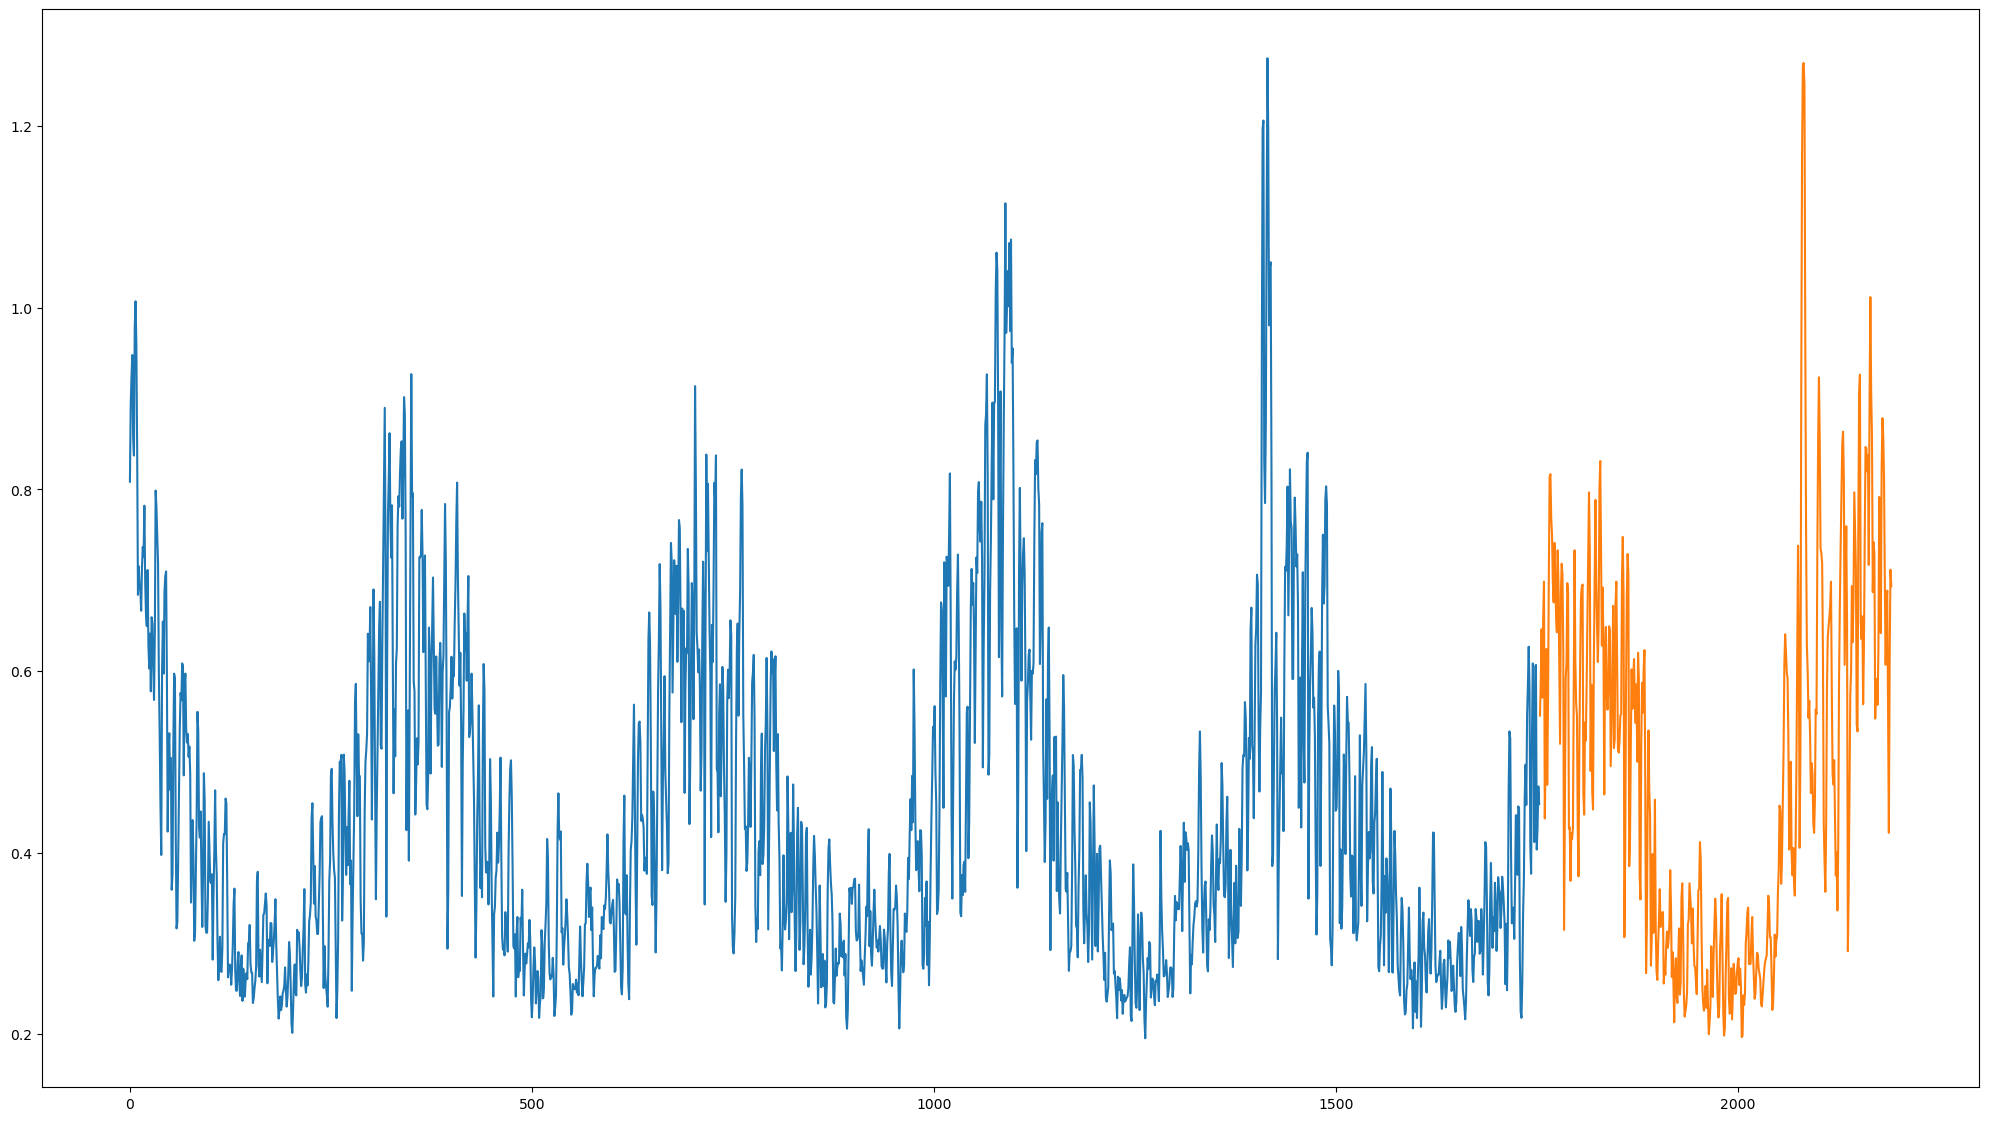

In [468]:
fig = plt.figure(figsize = (25,14))
plt.plot(train_df)
plt.plot(test_df)
plt.show()

Lets try an ARIMA model with our assumptions

In [492]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_df, order = (10,0,0))
model_fit= model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                CO_Conc   No. Observations:                 1754
Model:                ARIMA(10, 0, 0)   Log Likelihood                2122.995
Date:                Fri, 03 Sep 2021   AIC                          -4221.990
Time:                        15:19:17   BIC                          -4156.354
Sample:                             0   HQIC                         -4197.729
                               - 1754                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4492      0.045     10.089      0.000       0.362       0.537
ar.L1          1.0076      0.017     58.649      0.000       0.974       1.041
ar.L2         -0.3533      0.027    -12.936      0.000      -0.407      -0.300
ar.L3          0.1360      0.028      4.905      0.000       0.082       0.190
ar.L4         -0.0013      0.028     -0.048      0.962      -0.056       0.053
ar.L5          0.0483      0.030      1.627      0.104      -0.010       0.106
ar.L6          0.0195      0.029      0.672      0.502      -0.037       0.076
ar.L7          0.0304      0.026      1.152      0.250      -0.021       0.082
ar.L8         -0.0281      0.026     -1.068      0.285      -0.080       0.023
ar.L9          0.0511      0.025      2.039      0.041       0.002       0.100
ar.L10         0.0442      0.018      2.464      0.014       0.009       0.079
sigma2         0.0052      0.000     44.245      0.000       0.005       0.005
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               813.44
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               1.17   Skew:                            -0.30
Prob(H) (two-sided):                  0.06   Kurtosis:                         6.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [493]:
test_df

,CO_Conc
1754,0.550820
1755,0.588525
1756,0.645902
1757,0.570492
1758,0.657377
...,...
2187,0.558333
2188,0.421667
2189,0.613115
2190,0.711475


In [494]:
def forecast_next_day():
    fc = model_fit.predict(n_periods = 1)
    return(fc.tolist()[0])

In [495]:
range(1,438)

range(1, 438)

In [496]:
forecasts_new = list()
for i in range(438):
    fc = forecast_next_day()
    forecasts_new.append(fc)

In [497]:
forecasts_new

[0.4492291034855213,
 0.4492291034855213,
 0.4492291034855213,
 0.4492291034855213,
 0.4492291034855213,
 0.4492291034855213,
 0.4492291034855213,
 0.4492291034855213,
 0.4492291034855213,
 0.4492291034855213,
 0.4492291034855213,
 0.4492291034855213,
 0.4492291034855213,
 0.4492291034855213,
 0.4492291034855213,
 0.4492291034855213,
 0.4492291034855213,
 0.4492291034855213,
 0.4492291034855213,
 0.4492291034855213,
 0.4492291034855213,
 0.4492291034855213,
 0.4492291034855213,
 0.4492291034855213,
 0.4492291034855213,
 0.4492291034855213,
 0.4492291034855213,
 0.4492291034855213,
 0.4492291034855213,
 0.4492291034855213,
 0.4492291034855213,
 0.4492291034855213,
 0.4492291034855213,
 0.4492291034855213,
 0.4492291034855213,
 0.4492291034855213,
 0.4492291034855213,
 0.4492291034855213,
 0.4492291034855213,
 0.4492291034855213,
 0.4492291034855213,
 0.4492291034855213,
 0.4492291034855213,
 0.4492291034855213,
 0.4492291034855213,
 0.4492291034855213,
 0.4492291034855213,
 0.4492291034

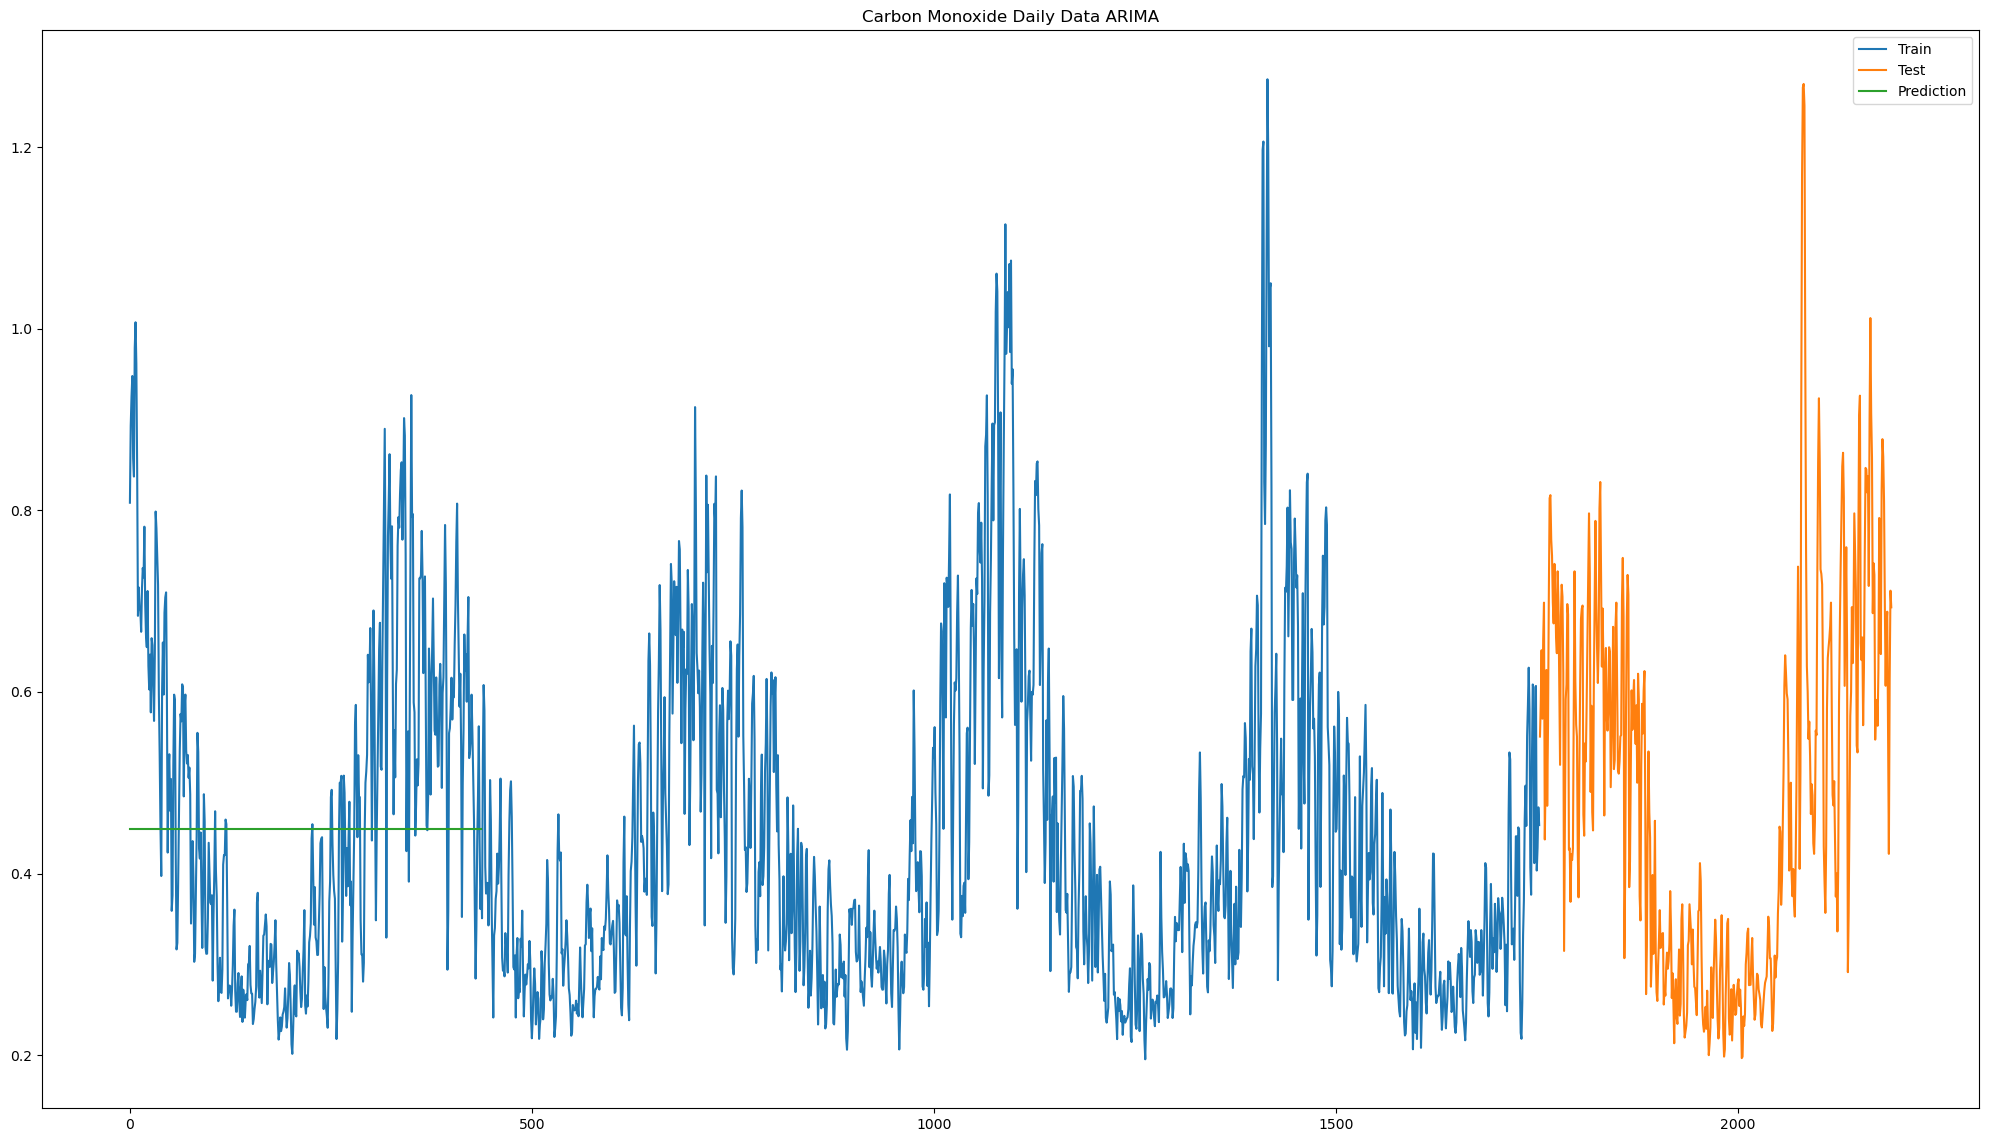

In [498]:

fig = plt.figure(figsize = (25,14))
plt.plot(train_df, label = "Train")
plt.plot(test_df, label = "Test")
plt.plot(forecasts_new, label = "Prediction")
plt.title('Carbon Monoxide Daily Data ARIMA')
plt.legend()
plt.show()

Clearly this ARIMA model didn't do a great job in predicting the values. Lets try another method using auto-arima

In [387]:
model=auto_arima(train_df,start_p=1,start_q=0,
          max_p=10,max_q=5, stationary=True,
          error_action='warn',trace=True,
          supress_warnings=True,stepwise=True,
          random_state=20,n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-4029.741, Time=0.30 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-1049.891, Time=0.18 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-2686.131, Time=0.42 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2358.103, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-4064.421, Time=0.61 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-4155.903, Time=1.44 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-4172.961, Time=2.11 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-4193.087, Time=2.12 sec
 ARIMA(6,0,0)(0,0,0)[0] intercept   : AIC=-4200.004, Time=1.95 sec
 ARIMA(7,0,0)(0,0,0)[0] intercept   : AIC=-4203.630, Time=2.26 sec
 ARIMA(8,0,0)(0,0,0)[0] intercept   : AIC=-4206.627, Time=2.66 sec
 ARIMA(9,0,0)(0,0,0)[0] intercept   : AIC=-4220.599, Time=3.03 sec
 ARIMA(10,0,0)(0,0,0)[0] intercept   : AIC=-4221.990, Time=4.12 sec
 ARIMA(10,0,1)(0,0,0)[0] intercept   : AIC=-4218.564, Time=4.35 sec
 ARIMA(9,0,1)(0,0,

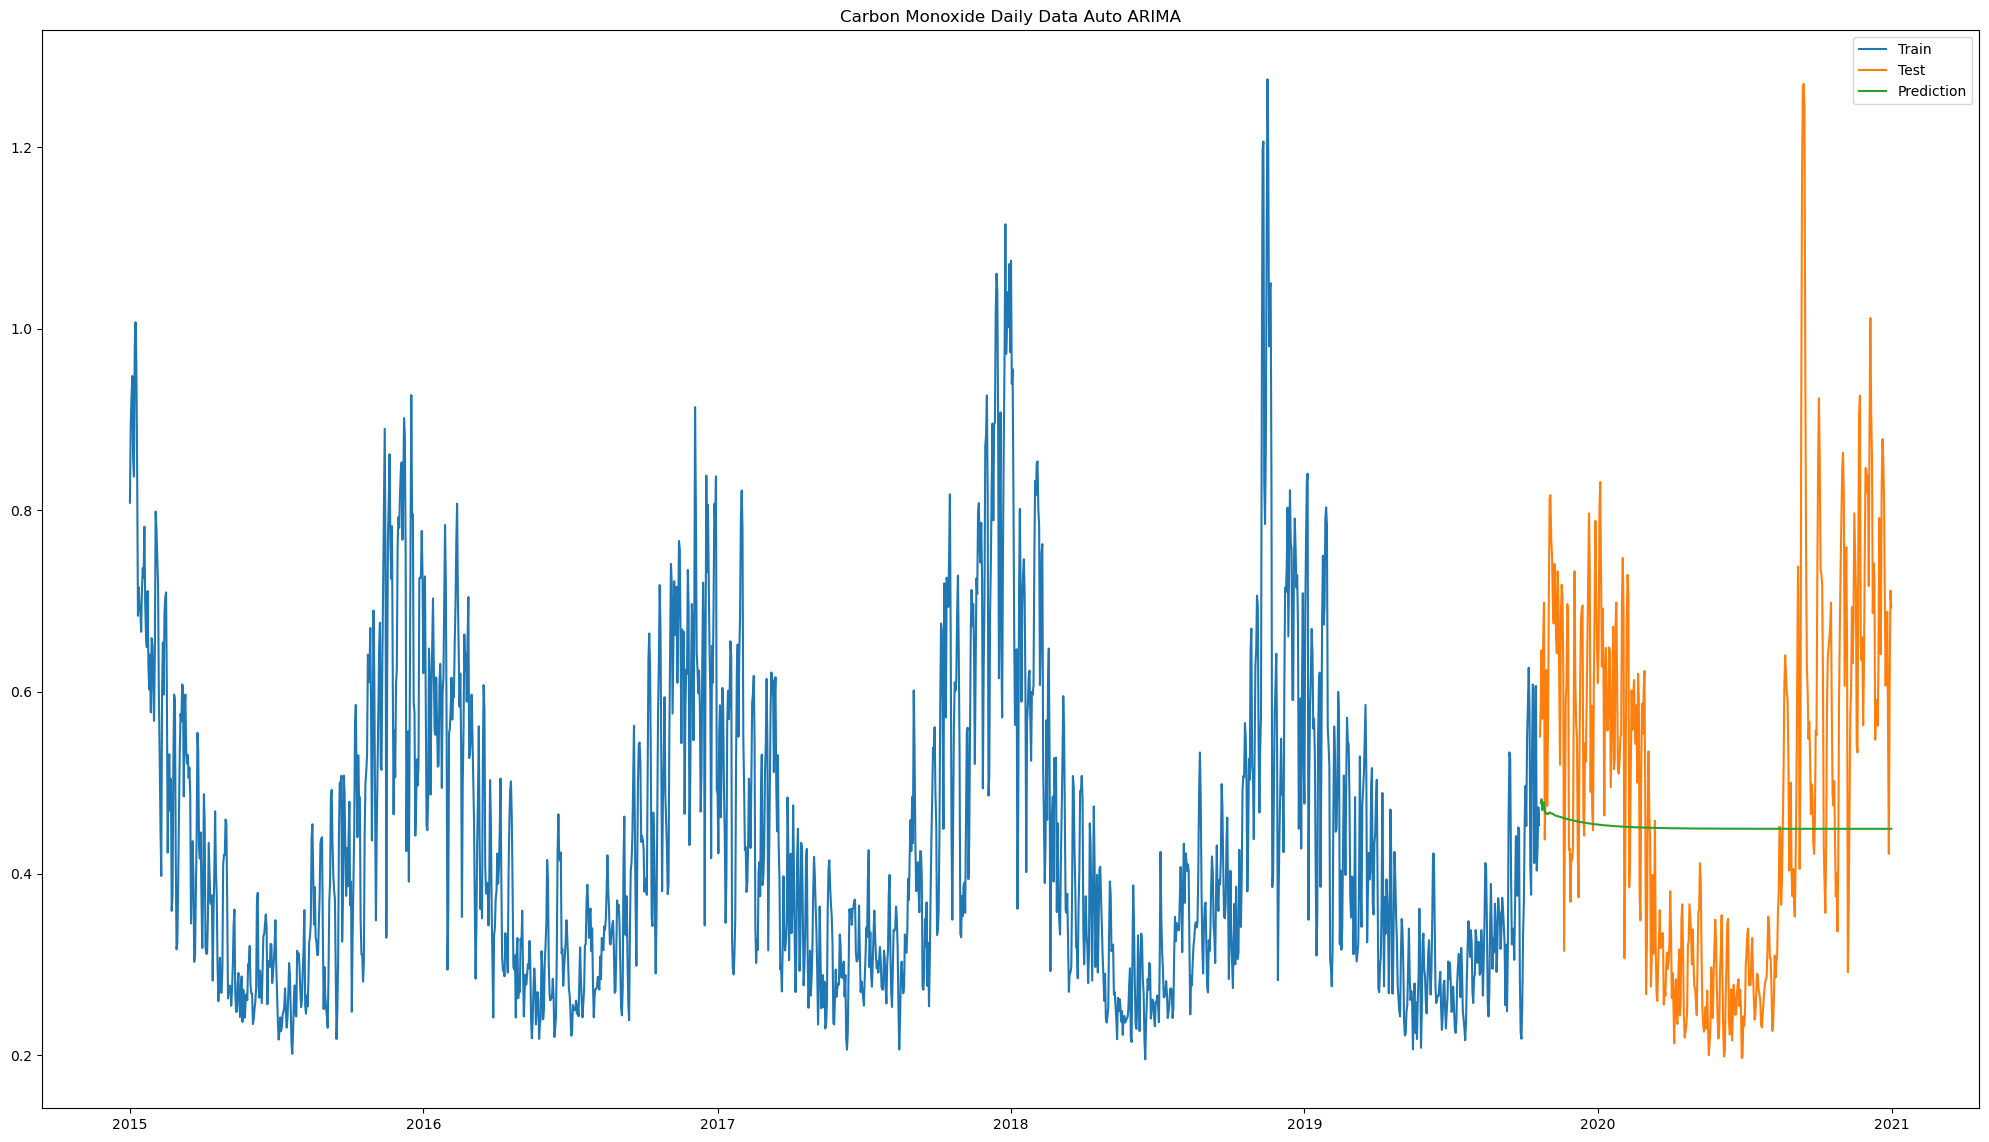

In [444]:
model = ARIMA(train_df, order = (10,0,0))
model_fit= model.fit()
forecast= model_fit.predict(start = "2019-10-22", end = "2020-12-31")
forecast_df = pd.DataFrame(forecast)
fig = plt.figure(figsize = (25,14))
plt.plot(train_df, label = "Train")
plt.plot(test_df, label = "Test")
plt.plot(forecast_df, label = "Prediction")
plt.title('Carbon Monoxide Daily Data Auto ARIMA')
plt.legend()
plt.show()

Looks like the model is overfitting on the training data due to there being daily fluctuations. Hence, it predicts badly on the test data. Also as the ARIMA model learns on itself (i.e. the past values), one bad prediction can cause several bad predictions

Lets try only using 2 years for a train-test split and see if the model performs better.

In [446]:
after_2019 = arima_df[-731:]
test_df = after_2019[-183:] #halfway through 2020

In [390]:
model=auto_arima(after_2019,start_p=1,start_q=0,
          max_p=10,max_q=5, stationary=True,
          error_action='warn',trace=True,
          supress_warnings=True,stepwise=True,
          random_state=20,n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1577.338, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-371.410, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-1071.544, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1015.316, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-1602.397, Time=0.37 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-1648.100, Time=0.33 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-1646.430, Time=0.69 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1659.989, Time=0.79 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1633.687, Time=0.56 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-1644.777, Time=0.85 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-1679.641, Time=0.85 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-1672.963, Time=0.70 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.16 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=-1679.082, Time=0.98 sec
 ARIMA(2,0,3)(0,0,0)[0] int

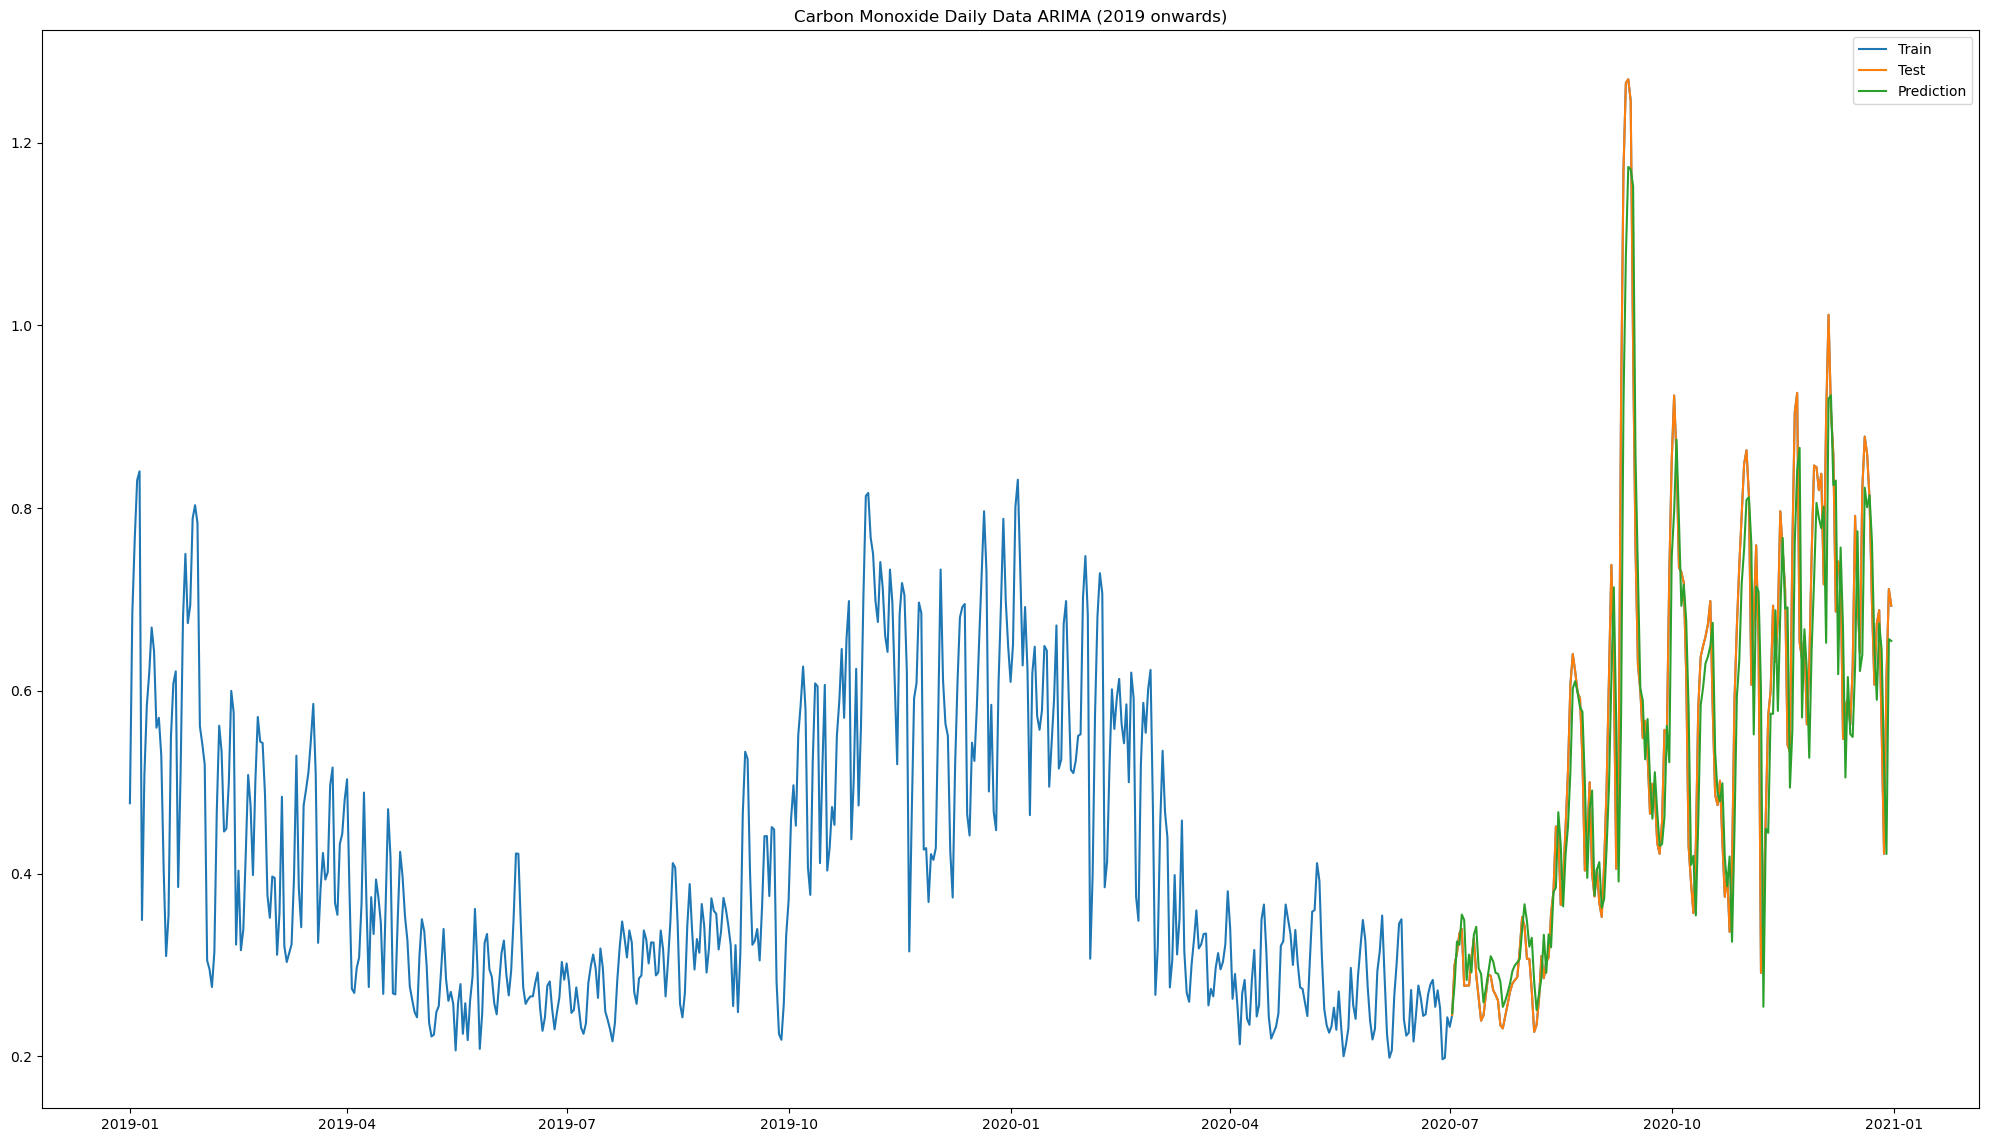

In [448]:
model = ARIMA(after_2019, order = (3,0,2))
model_fit= model.fit()
forecast= model_fit.predict(start = "2020-07-02", end = "2020-12-31")
forecast_df = pd.DataFrame(forecast)
fig = plt.figure(figsize = (25,14))
plt.plot(after_2019, label = "Train")
plt.plot(test_df, label = "Test")
plt.plot(forecast_df, label = "Prediction")
plt.title('Carbon Monoxide Daily Data ARIMA (2019 onwards)')
plt.legend()
plt.show()

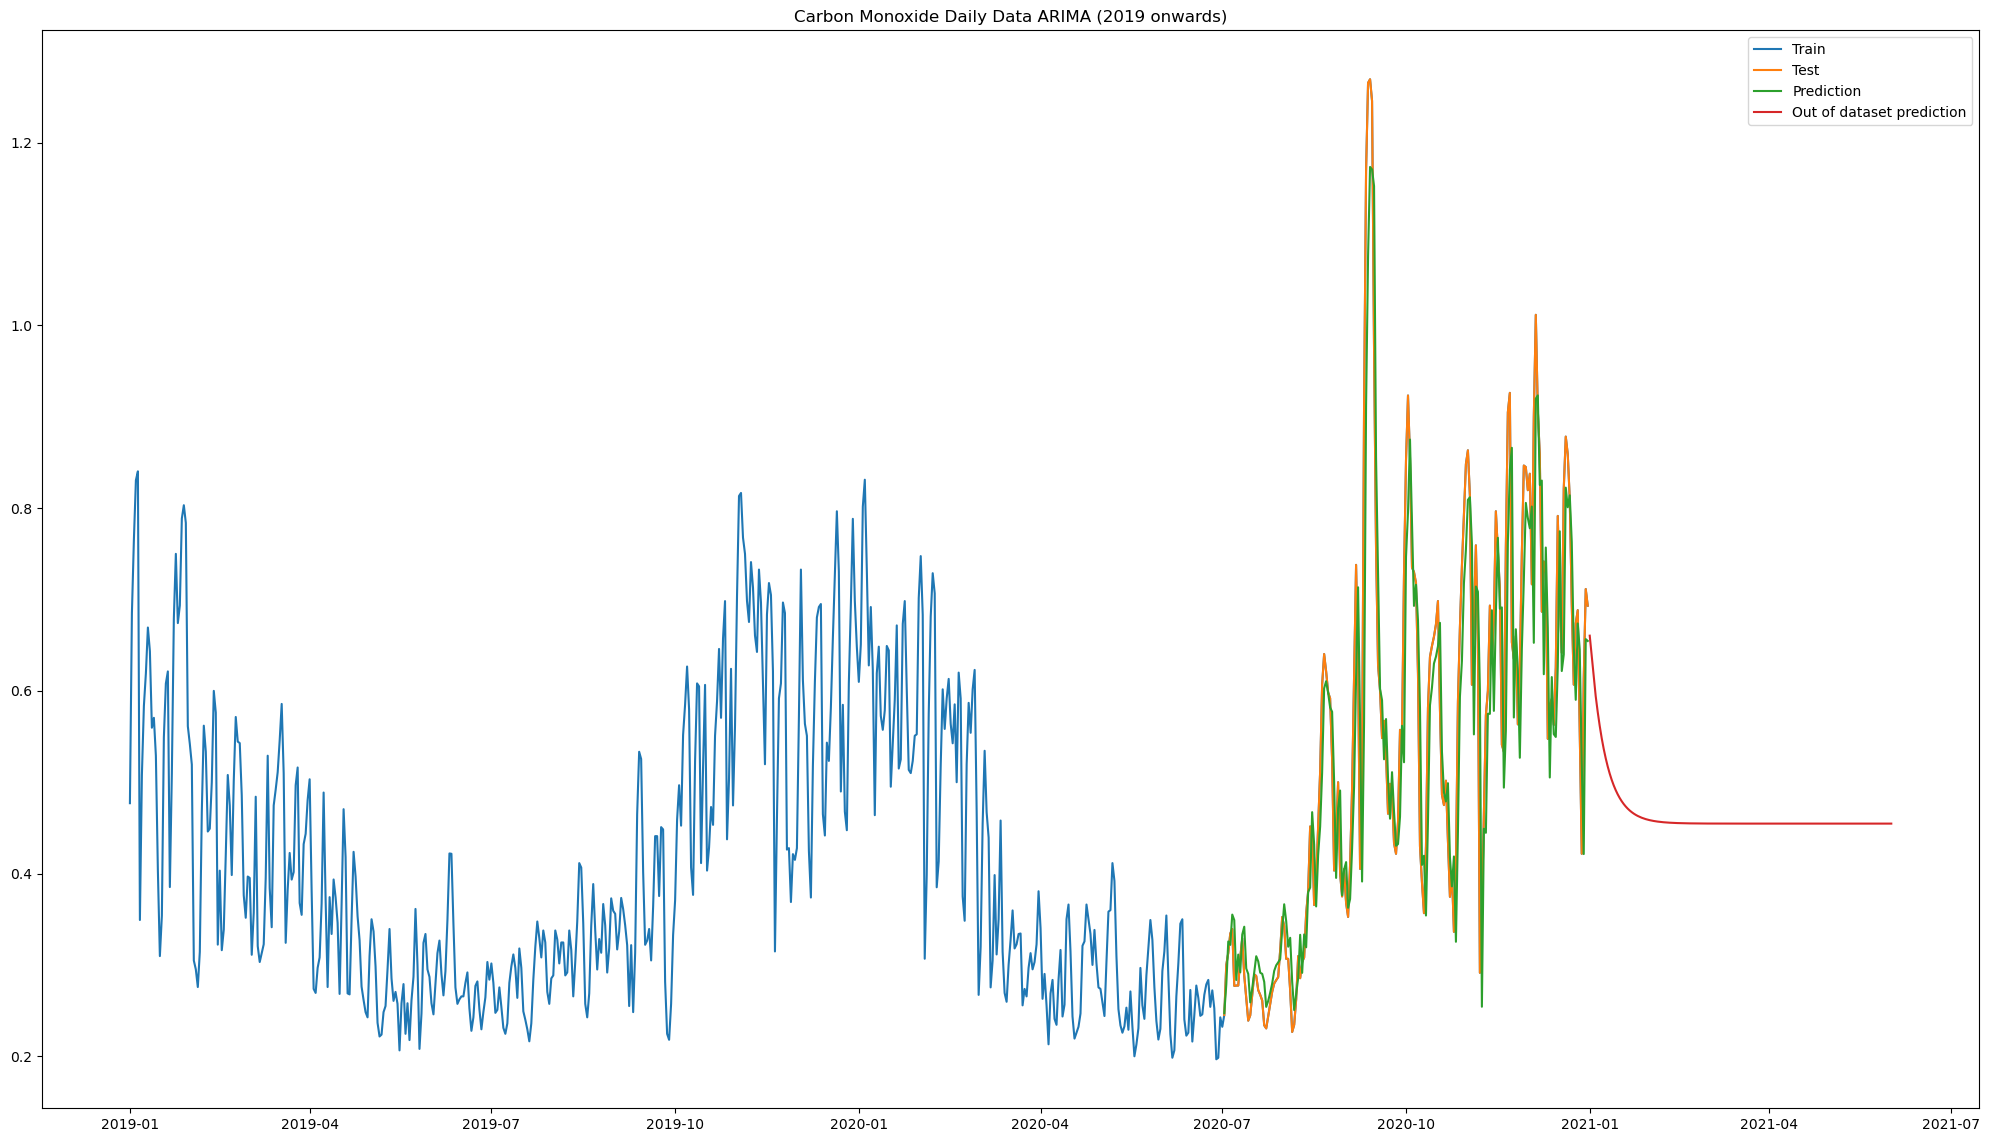

In [449]:
prediciton = model_fit.predict( start = "2021-01-01", end = "2021-06-01") 
prediction_df = pd.DataFrame(prediciton)
fig = plt.figure(figsize = (25,14))
plt.plot(after_2019, label = "Train")
plt.plot(test_df, label = "Test")
plt.plot(forecast_df, label = "Prediction")
plt.plot(prediction_df, label = "Out of dataset prediction")
plt.title('Carbon Monoxide Daily Data ARIMA (2019 onwards)')
plt.legend()
plt.show()

Looks like the model is overfitting with daily data, lets try with monthly data as the curve will be smoother

## ARIMA with Monthly Data

Maybe with monthly data it'll be easier to predict as there is less variation in the data

In [460]:
df.reset_index(inplace = True)

In [426]:
df_month_mean = df.groupby(pd.Grouper(key = 'date_time' , freq = "MS")).mean().reset_index()
df_month_mean.set_index('date_time', inplace = True)
arima_df_month = df_month_mean[["CO_Conc"]]
train_df_month = arima_df_month[:58]
test_df_month = arima_df_month[-15:]

In [427]:
model=auto_arima(train_df_month,start_p=1,start_q=0,
          max_p=10,max_q=5, stationary=True,
          error_action='warn',trace=True,
          supress_warnings=True,stepwise=True,
          random_state=20,n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-98.695, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-53.016, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-83.372, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=77.485, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-106.288, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-123.359, Time=0.15 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-125.564, Time=0.11 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-129.351, Time=0.27 sec
 ARIMA(6,0,0)(0,0,0)[0] intercept   : AIC=-132.874, Time=0.23 sec
 ARIMA(7,0,0)(0,0,0)[0] intercept   : AIC=-134.043, Time=0.30 sec
 ARIMA(8,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(7,0,1)(0,0,0)[0] intercept   : AIC=-135.252, Time=0.30 sec
 ARIMA(6,0,1)(0,0,0)[0] intercept   : AIC=-135.028, Time=0.24 sec
 ARIMA(8,0,1)(0,0,0)[0] intercept   : AIC=-136.209, Time=0.31 sec
 ARIMA(9,0,1)(0,0,0)[0] intercept   : AIC=-

In [502]:
model = ARIMA(train_df_month, order = (8,0,1))
model_fit= model.fit()
forecast_month= model_fit.predict(start = "2019-10-01", end = "2020-12-01")
forecast_df_month = pd.DataFrame(forecast_month)
fig = plt.figure(figsize = (25,14))
plt.plot(train_df_month, label = "Train")
plt.plot(test_df_month, label = "Test")
plt.plot(forecast_df_month, label = "Prediction")
plt.title('Carbon Monoxide Monthly Data ARIMA')
plt.legend()
from urllib.request import urlopen
fig.write_html("CO_ARIMA")
plt.show()

AttributeError: 'Figure' object has no attribute 'write_html'

In [429]:
from sklearn.metrics import r2_score, mean_squared_error
print(mean_squared_error(forecast_df_month,test_df_month))
print(r2_score(forecast_df_month,test_df_month))

0.007788193819713201
0.5989623680793388


Decent r-squared values on the test set, now lets train the model without the COVID data

### Monthly Prediction (No 2019)

In [430]:
train_df_month_no_covid = arima_df_month[:46] #only till 2018
test_df_month_no_covid = arima_df_month[-27:]

In [431]:
model=auto_arima(train_df_month_no_covid,start_p=1,start_q=0,
          max_p=10,max_q=5, stationary=True,
          error_action='warn',trace=True,
          supress_warnings=True,stepwise=True,
          random_state=20,n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-81.412, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-41.679, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-67.071, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=62.016, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-90.032, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-106.010, Time=0.09 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=-106.542, Time=0.19 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=-107.061, Time=0.20 sec
 ARIMA(6,0,0)(0,0,0)[0] intercept   : AIC=-106.860, Time=0.18 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=-107.381, Time=0.24 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=-112.203, Time=0.19 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-115.192, Time=0.22 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-108.041, Time=0.16 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-111.044, Time=0.23 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : A

In [432]:
model_ = ARIMA(train_df_month_no_covid, order = (3,0,1))
model_fit_= model_.fit()
forecast_month_no_covid= model_fit_.predict(start = "2018-10-01", end = "2020-12-31")
forecast_df_month_no_covid = pd.DataFrame(forecast_month_no_covid)

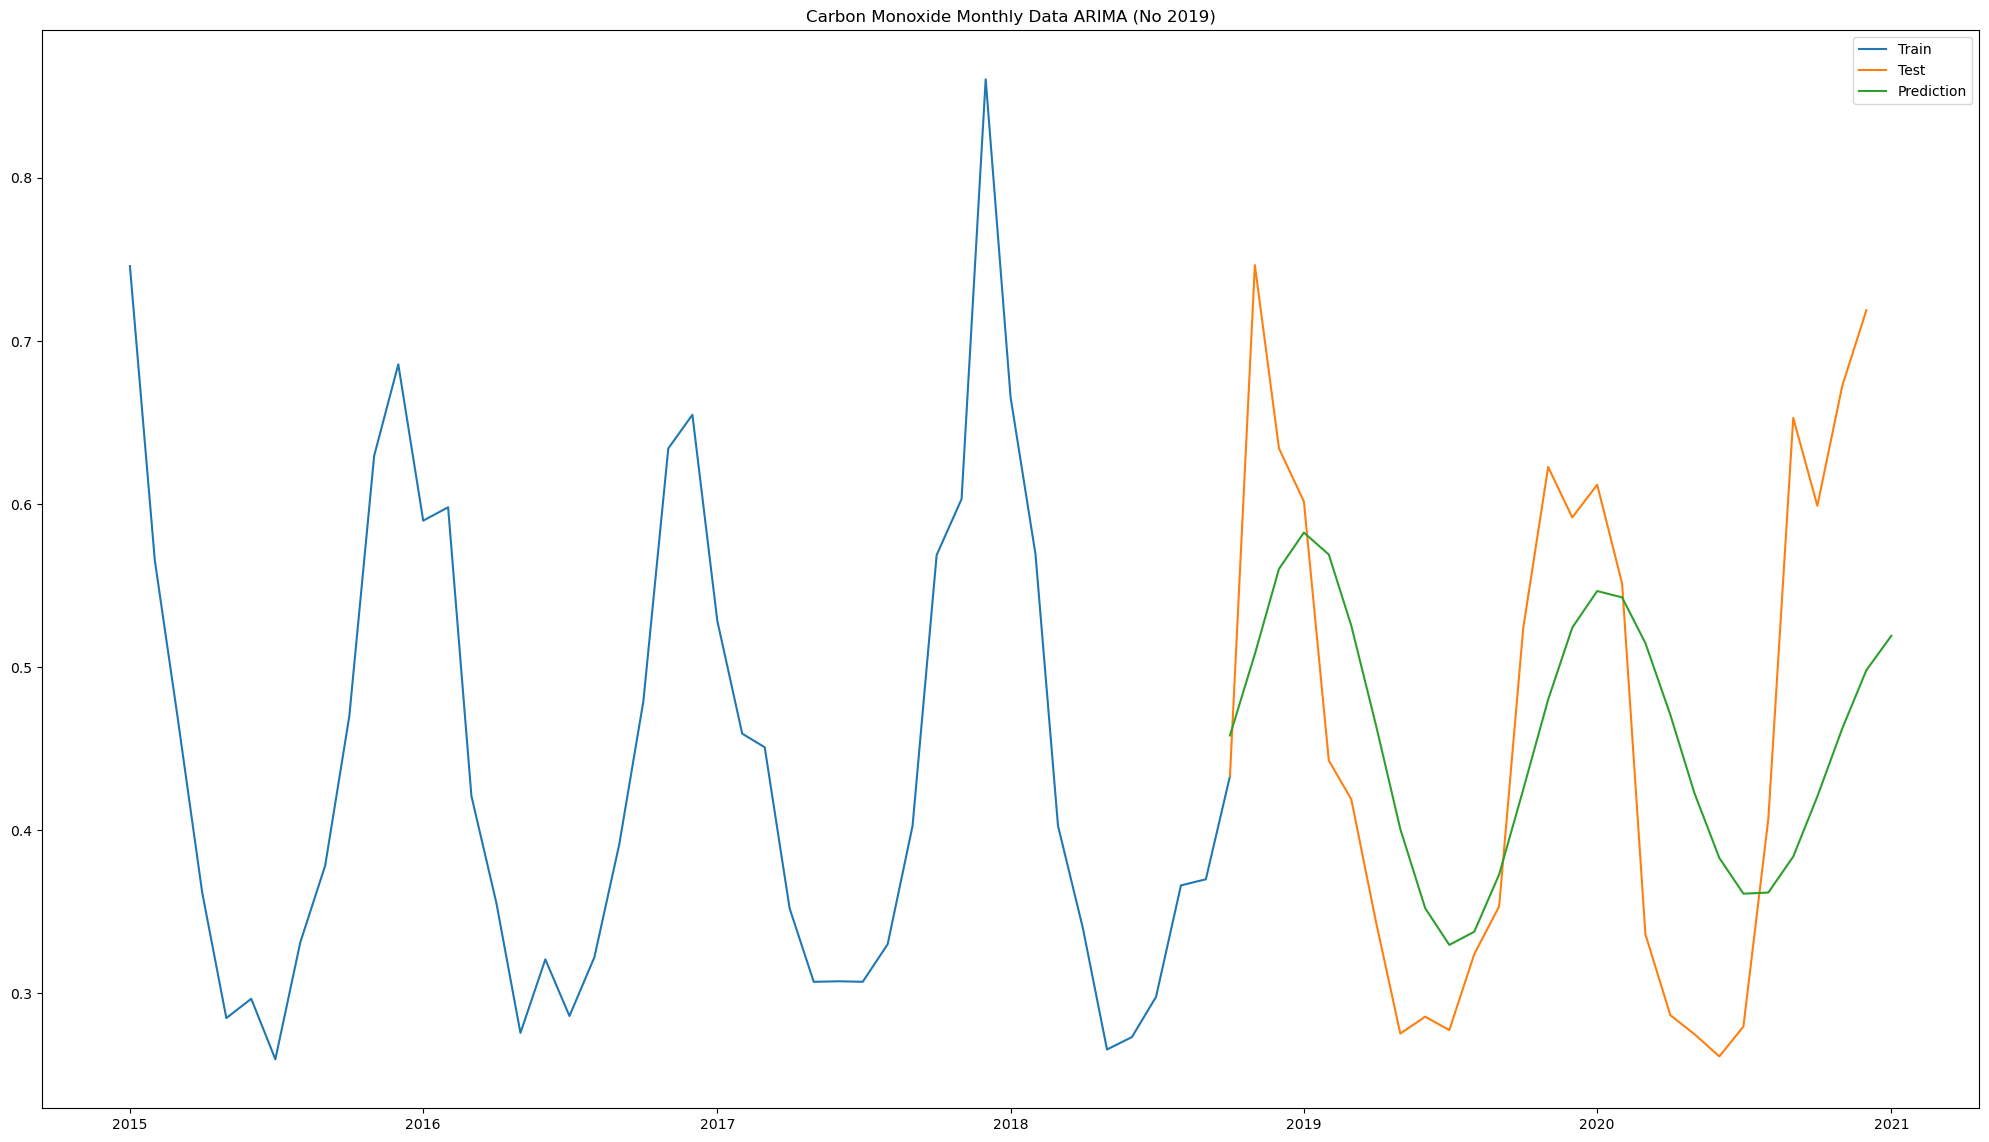

In [451]:
fig = plt.figure(figsize = (25,14))
plt.plot(train_df_month_no_covid, label = "Train")
plt.plot(test_df_month_no_covid, label = "Test")
plt.plot(forecast_df_month_no_covid, label = "Prediction")
plt.title('Carbon Monoxide Monthly Data ARIMA (No 2019)')
plt.legend()
plt.show()

While this model learns the trend, it doesn't predict values too well. This is probably due to the training set being too small.

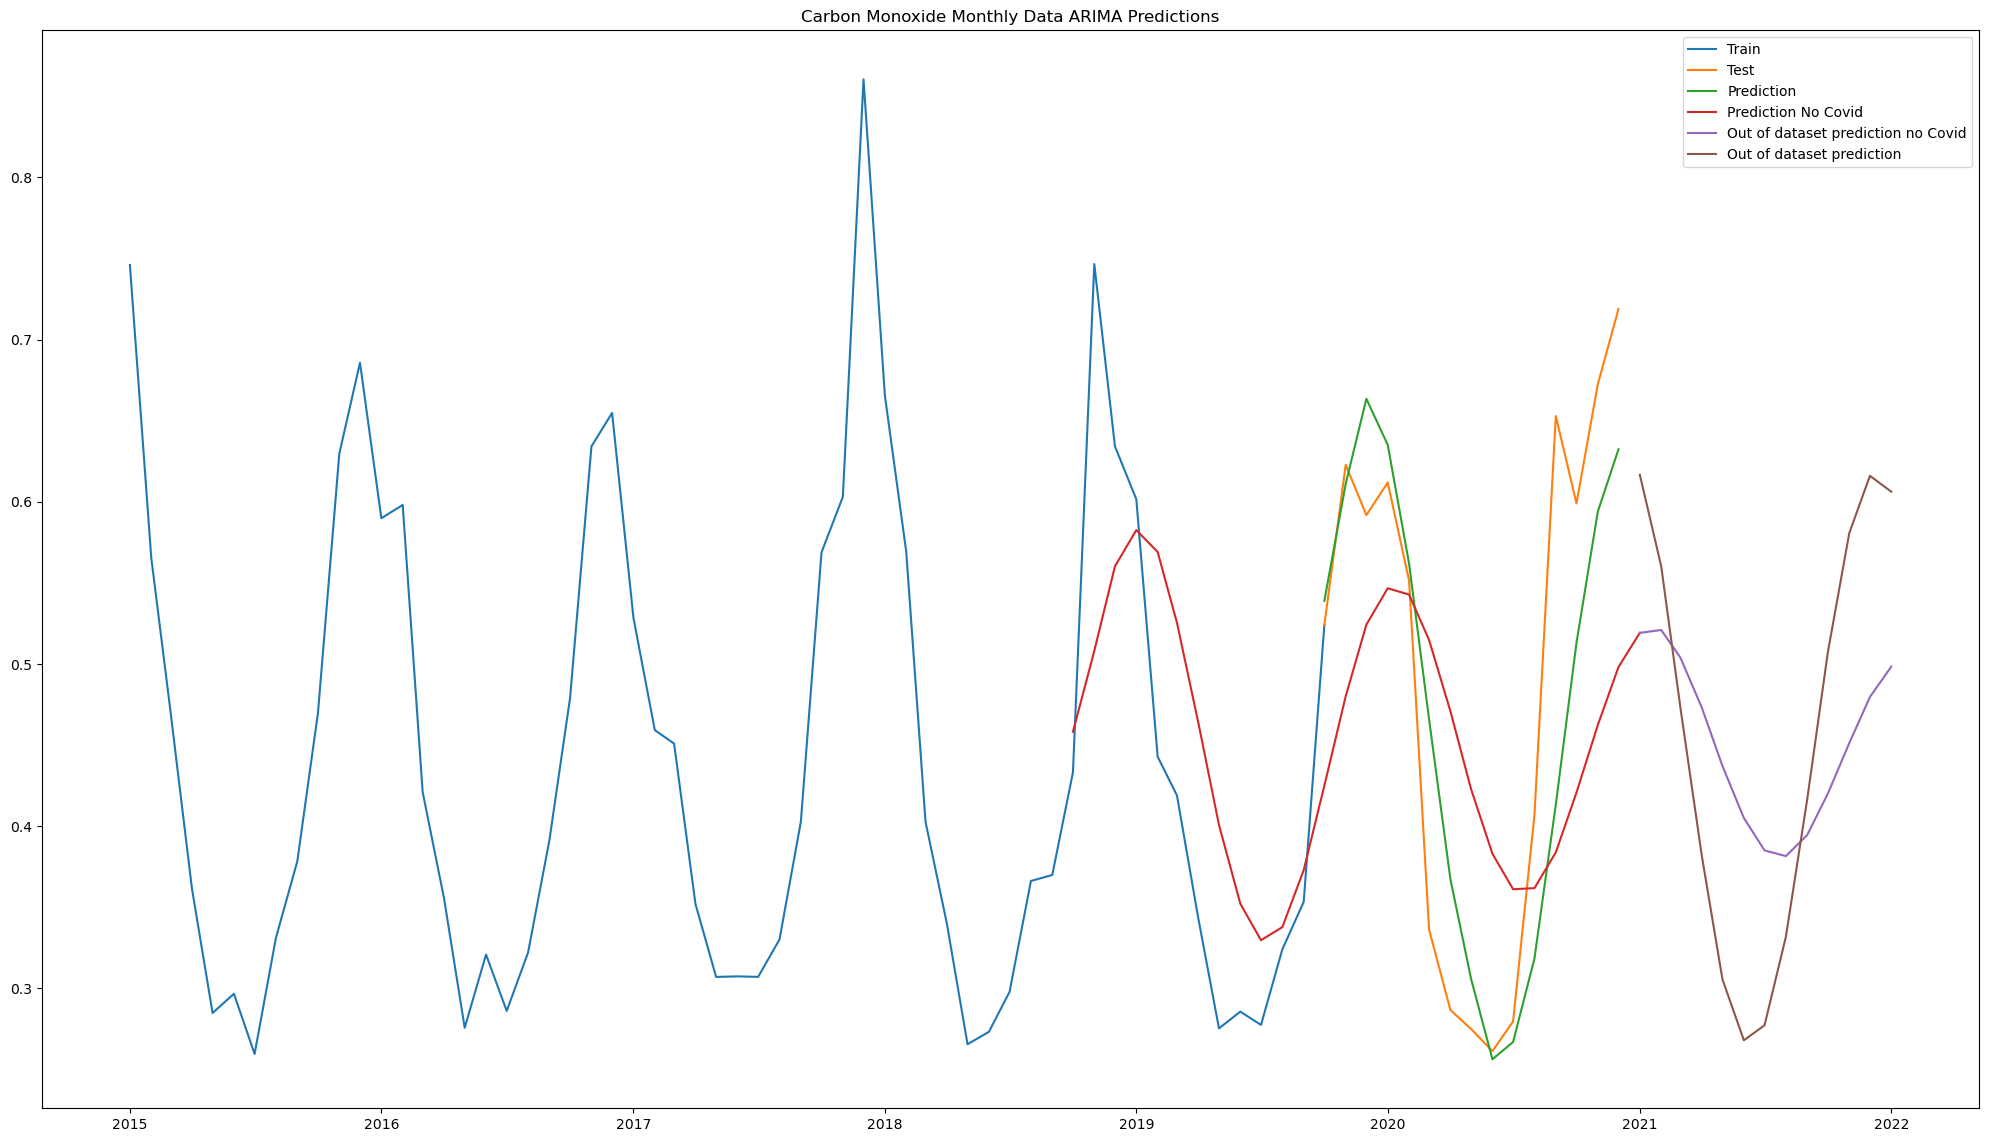

In [452]:
prediciton_month = model_fit.predict( start = "2020-12-31", end = "2022-01-01") 
prediction_df_month = pd.DataFrame(prediciton_month)
prediciton_month_no_covid= model_fit_.predict(start = "2020-12-31", end = "2022-01-01")
prediction_df_month_no_covid = pd.DataFrame(prediciton_month_no_covid)
fig = plt.figure(figsize = (25,14))
plt.plot(train_df_month, label = "Train")
plt.plot(test_df_month, label = "Test")
plt.plot(forecast_df_month, label = "Prediction")
plt.plot(forecast_df_month_no_covid, label = "Prediction No Covid")
plt.plot(prediction_df_month_no_covid, label = "Out of dataset prediction no Covid")
plt.plot(prediction_df_month, label = "Out of dataset prediction")
plt.title('Carbon Monoxide Monthly Data ARIMA Predictions')
plt.legend()
plt.show()

Evidently the no COVID model does a worse job at predicting values

In [403]:
prediction_df_month

,predicted_mean
2021-01-01,0.616602
2021-02-01,0.560260
2021-03-01,0.472721
2021-04-01,0.381622
2021-05-01,0.305465
2021-06-01,0.268043
2021-07-01,0.277279
2021-08-01,0.331837
2021-09-01,0.416711
2021-10-01,0.507446


This seems to be our best performing model with the given data. Above are the predictions of CO concentration in California in 2021.

### Lets try with weekly data now

In [412]:
df.set_index('date_time', inplace = True)

In [413]:
df_week_mean = df.groupby(pd.Grouper(freq = "7D")).mean().reset_index()
arima_df_week = df_week_mean[["CO_Conc"]]
train_df_week = arima_df_week[:251]
test_df_week = arima_df_week[-65:]

In [414]:
model=auto_arima(train_df_week,start_p=1,start_q=0,
          max_p=10,max_q=5, stationary=True,
          error_action='warn',trace=True,
          supress_warnings=True,stepwise=True,
          random_state=20,n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-465.503, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-194.371, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-323.619, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=333.153, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-488.429, Time=0.14 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-488.281, Time=0.24 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-488.624, Time=0.26 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-490.103, Time=0.19 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-488.669, Time=0.30 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-390.737, Time=0.12 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-495.525, Time=0.49 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-484.647, Time=0.54 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=-487.826, Time=0.51 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=-486.874, Time=0.32 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept 

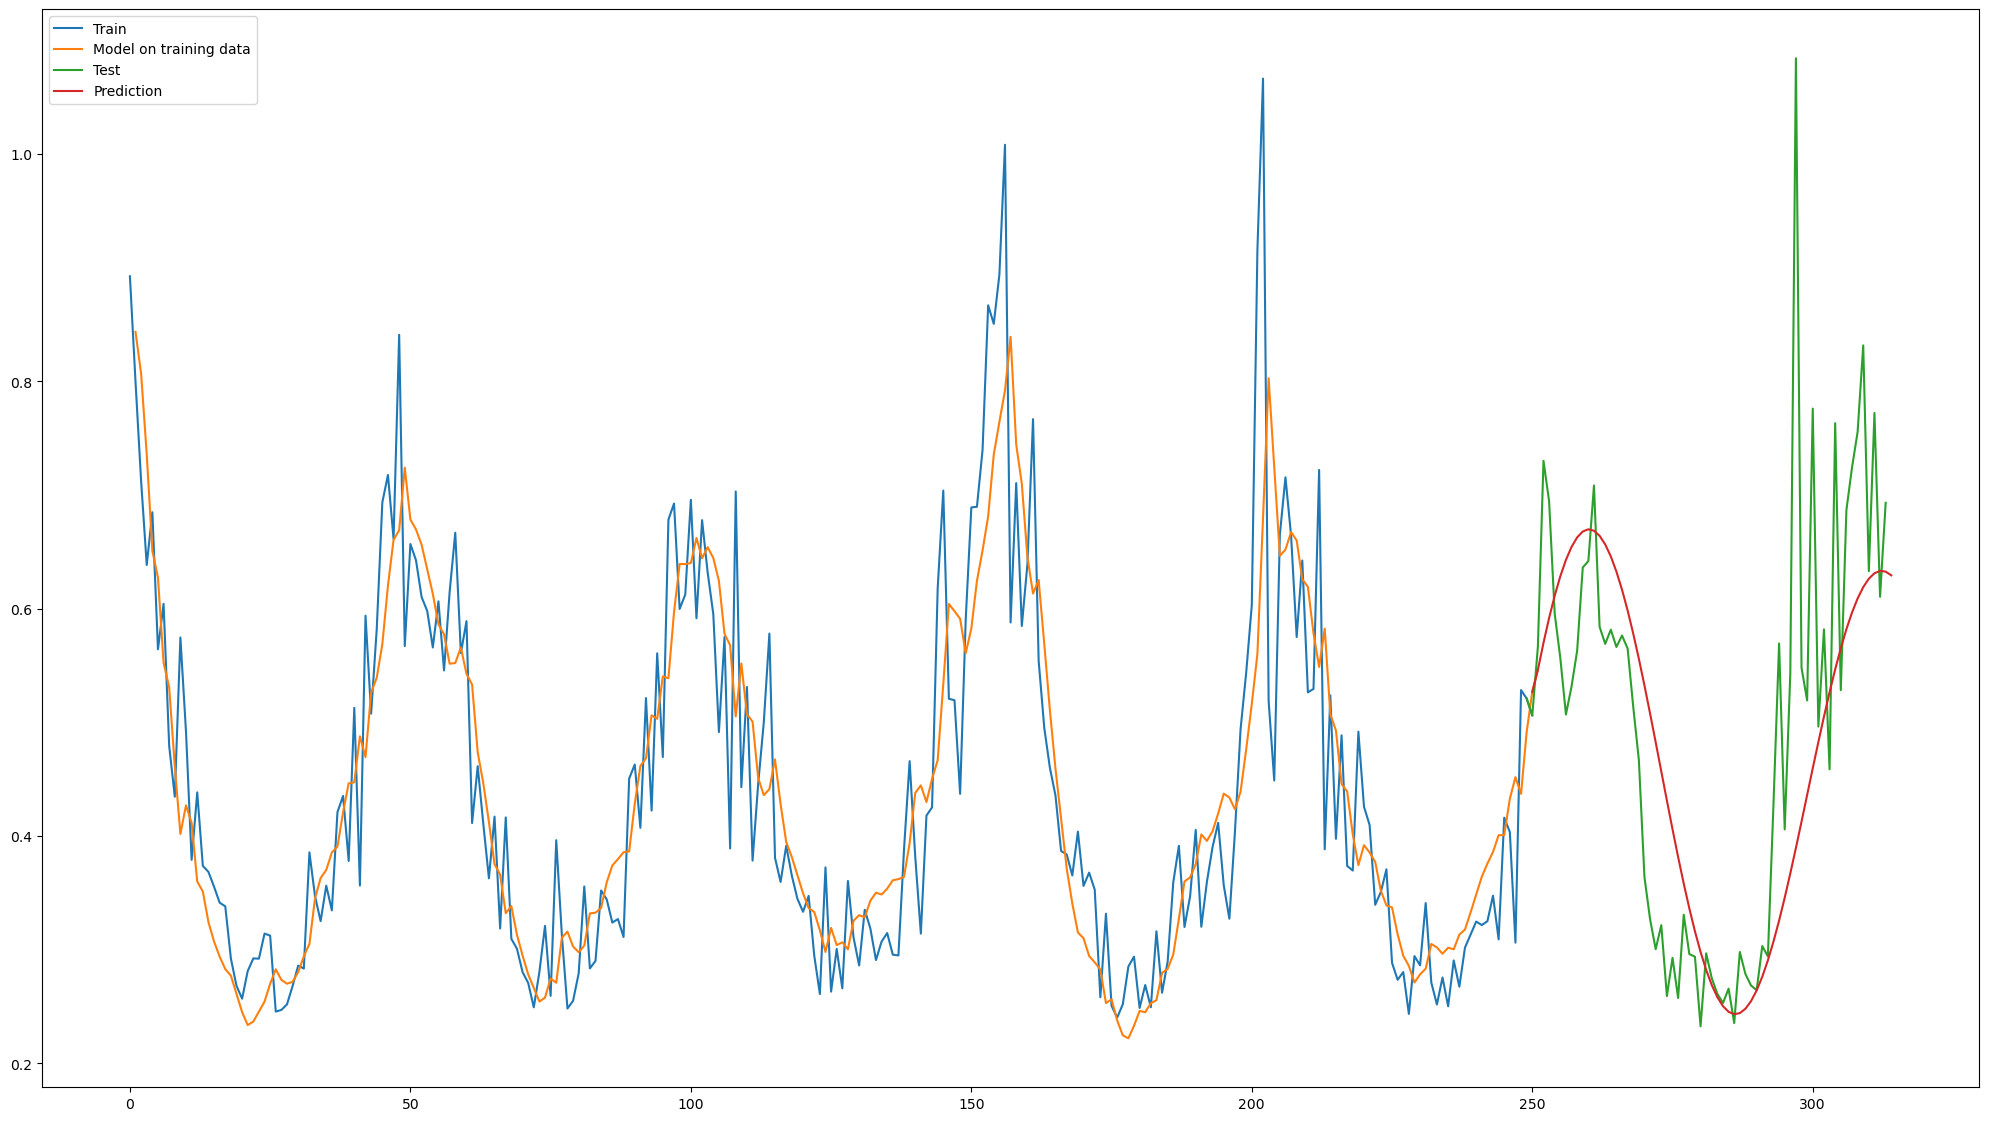

In [415]:
model = ARIMA(train_df_week, order = (2,0,2))
model_fit= model.fit()
forecast_week= model_fit.predict(start = 1, end = 314)
forecast_df_week = pd.DataFrame(forecast_week)
fig = plt.figure(figsize = (25,14))
plt.plot(train_df_week, label = "Train")
plt.plot(forecast_df_week[:251], label = "Model on training data")
plt.plot(test_df_week, label = "Test")
plt.plot(forecast_df_week[-65:], label = "Prediction")
plt.legend()
plt.show()

With weekly data, it looks like it is bad at prediciting on unseen data.

In [416]:
print(mean_squared_error(forecast_df_week[-65:],test_df_week))
print(r2_score(forecast_df_week[-65:],test_df_week))

0.015998232456074526
0.2639204889101374


There is evidence of overfitting here too.